In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
cr = pd.read_csv('/content/drive/MyDrive/fraudTrain.csv')
cr.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [20]:
df=cr.drop(['trans_date_trans_time','cc_num','merchant','street','lat','long','city_pop', 'dob', 'trans_num',	'unix_time'	,'merch_lat','merch_long','state','zip','first', 'last'], axis= 'columns')

In [21]:
df.head()

,Unnamed: 0,category,amt,gender,city,job,is_fraud
0,0,misc_net,4.97,F,Moravian Falls,"Psychologist, counselling",0
1,1,grocery_pos,107.23,F,Orient,Special educational needs teacher,0
2,2,entertainment,220.11,M,Malad City,Nature conservation officer,0
3,3,gas_transport,45.00,M,Boulder,Patent attorney,0
4,4,misc_pos,41.96,M,Doe Hill,Dance movement psychotherapist,0


In [22]:
df.isnull().sum()

Unnamed: 0    0
category      0
amt           0
gender        0
city          0
job           0
is_fraud      0
dtype: int64

In [23]:
df.dtypes

Unnamed: 0      int64
category       object
amt           float64
gender         object
city           object
job            object
is_fraud        int64
dtype: object

In [24]:
df['job'].value_counts()

job
Film/video editor             9779
Exhibition designer           9199
Naval architect               8684
Surveyor, land/geomatics      8680
Materials engineer            8270
                              ... 
Information officer              8
Veterinary surgeon               8
Ship broker                      7
Contracting civil engineer       7
Warehouse manager                7
Name: count, Length: 494, dtype: int64

In [25]:
df['category'].value_counts()

category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: count, dtype: int64

In [26]:
df['city'].value_counts()

city
Birmingham     5617
San Antonio    5130
Utica          5105
Phoenix        5075
Meridian       5060
               ... 
Vacaville         7
Claypool          7
Karns City        7
Bruce             7
Chattanooga       7
Name: count, Length: 894, dtype: int64

Visual Representation

<Axes: xlabel='count', ylabel='category'>

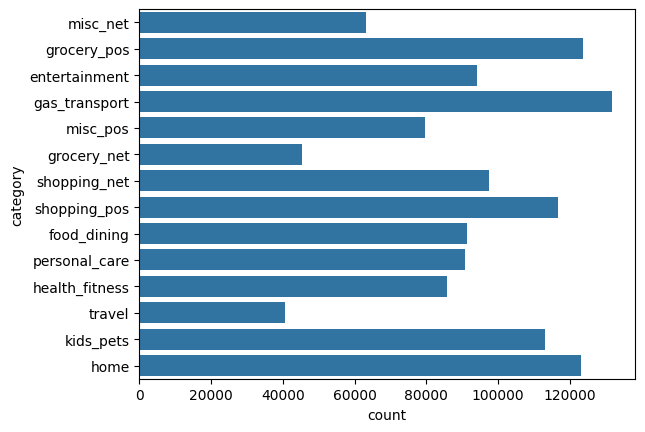

In [27]:
sns.countplot(df['category'],)

Displaying top-5 categories of customer category

<ipython-input-28-de279fcd6992>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=top_category_df, x='category', order=top_category, palette='viridis')


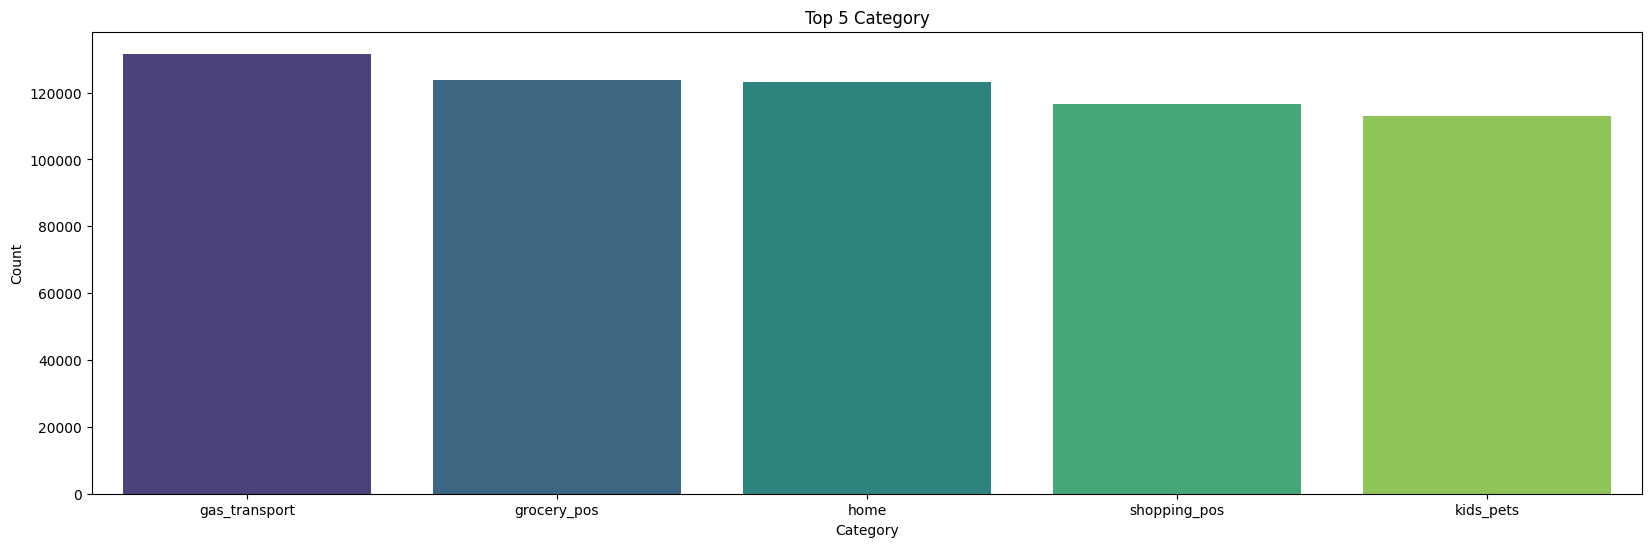

In [28]:
top_category = df['category'].value_counts().nlargest(5).index
top_category_df = df[df['category'].isin(top_category)]
plt.figure(figsize=(20,6))
sns.countplot(data=top_category_df, x='category', order=top_category, palette='viridis')
plt.title('Top 5 Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

Displaying top 5 jobs of people

<ipython-input-29-31e5237aade0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=top_job_df, x='job', order=top_job, palette='viridis')


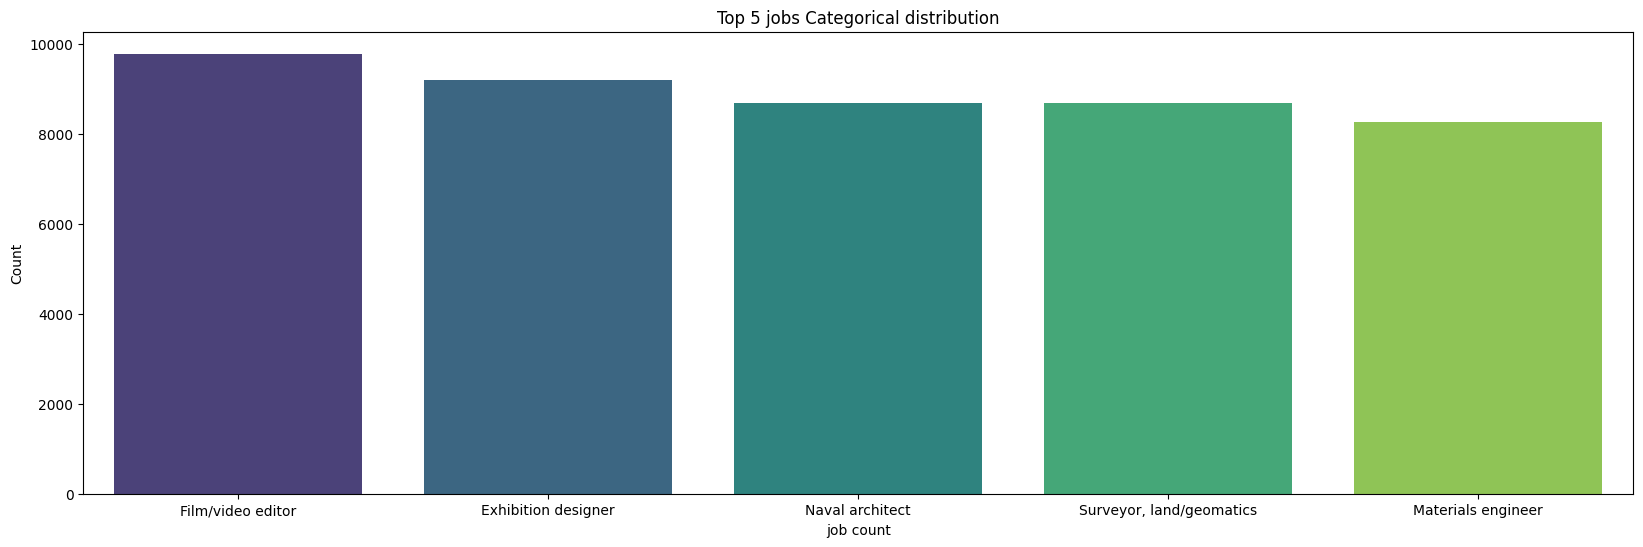

In [29]:
top_job = df['job'].value_counts().nlargest(5).index
top_job_df = df[df['job'].isin(top_job)]
plt.figure(figsize=(20,6))
sns.countplot(data=top_job_df, x='job', order=top_job, palette='viridis')
plt.title('Top 5 jobs Categorical distribution')
plt.xlabel('job count')
plt.ylabel('Count')
plt.show()

Displaying male to female percentage

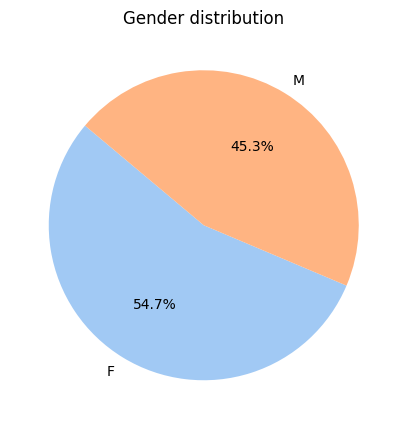

In [30]:
gender_counts = df['gender'].value_counts()
colors = sns.color_palette('pastel')
plt.figure(figsize=(5,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Gender distribution')
plt.show()

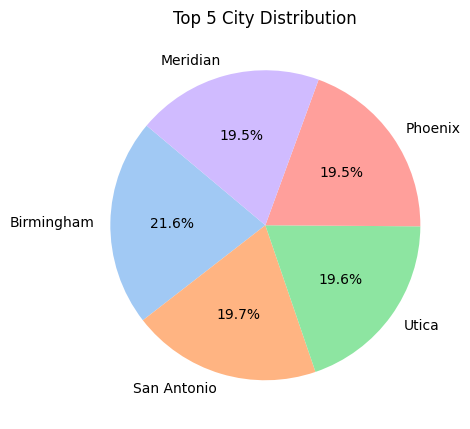

In [31]:
city_counts = df['city'].value_counts().nlargest(5)
colors = sns.color_palette('pastel')[0:len(city_counts)]
plt.figure(figsize=(5,6))
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Top 5 City Distribution')
plt.show()

In [32]:
df.head()

,Unnamed: 0,category,amt,gender,city,job,is_fraud
0,0,misc_net,4.97,F,Moravian Falls,"Psychologist, counselling",0
1,1,grocery_pos,107.23,F,Orient,Special educational needs teacher,0
2,2,entertainment,220.11,M,Malad City,Nature conservation officer,0
3,3,gas_transport,45.00,M,Boulder,Patent attorney,0
4,4,misc_pos,41.96,M,Doe Hill,Dance movement psychotherapist,0


Data Cleaning

In [41]:
df['gender'].replace({'M': 1, 'F': 0},inplace=True)

In [39]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()

# Apply LabelEncoder to each column separately
for col in ['category', 'city', 'job']:
    df[col] = le.fit_transform(df[col])

# If you need one-hot encoding, use OneHotEncoder after LabelEncoding
# ohe = OneHotEncoder()
# df_encoded = ohe.fit_transform(df[['category', 'city', 'job']])

In [42]:
df.head()

,Unnamed: 0,category,amt,gender,city,job,is_fraud
0,0,8,4.97,0,526,370,0
1,1,4,107.23,0,612,428,0
2,2,0,220.11,1,468,307,0
3,3,2,45.00,1,84,328,0
4,4,9,41.96,1,216,116,0


In [43]:
df.dtypes

Unnamed: 0      int64
category        int64
amt           float64
gender          int64
city            int64
job             int64
is_fraud        int64
dtype: object

In [46]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'data' is a NumPy array or pandas DataFrame with numerical features
scaler = MinMaxScaler()
numerical_cols = ['category', 'city', 'job']

# Extract the numerical data from the DataFrame
numerical_data = df[numerical_cols]

# Scale the numerical data using MinMaxScaler
scaled_data = scaler.fit_transform(numerical_data)

df[numerical_cols] = scaled_data

In [47]:
df.head()

,Unnamed: 0,category,amt,gender,city,job,is_fraud
0,0,0.615385,4.97,0,0.589026,0.750507,0
1,1,0.307692,107.23,0,0.685330,0.868154,0
2,2,0.000000,220.11,1,0.524076,0.622718,0
3,3,0.153846,45.00,1,0.094065,0.665314,0
4,4,0.692308,41.96,1,0.241881,0.235294,0


In [48]:
df['amt']=df['amt'].astype(int)

In [49]:
df.dtypes

Unnamed: 0      int64
category      float64
amt             int64
gender          int64
city          float64
job           float64
is_fraud        int64
dtype: object

Splitting the data into train and test

In [51]:
X = df.drop('is_fraud', axis= 1)
Y = df['is_fraud']

In [52]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.2,random_state=42)

In [53]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain, ytrain)

LogisticRegression()

In [54]:
lr.score(xtrain, ytrain)

0.9936626371295815

In [55]:
from sklearn.metrics import accuracy_score
ypred = lr.predict(xtest)
accuracy_score(ytest, ypred)

0.993564308712669

We get an accuracy of about 99 % after training the model